# WLC Maps Grapher
##To gitHub

With this code, we generate WLC maps and density maps for values of (g,alpha)

In [1]:
#Libraries

import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import string

from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import LogNorm



### Map Generator Fig6 a-l

##Panel label Generator.
Label function.

In [19]:
def panel_label(ax, label):
    ax.text(-0.1, 0.98, f"({label})", transform=ax.transAxes, ha="left", va="top", fontsize=9, color="black")
    



### WLC map generator

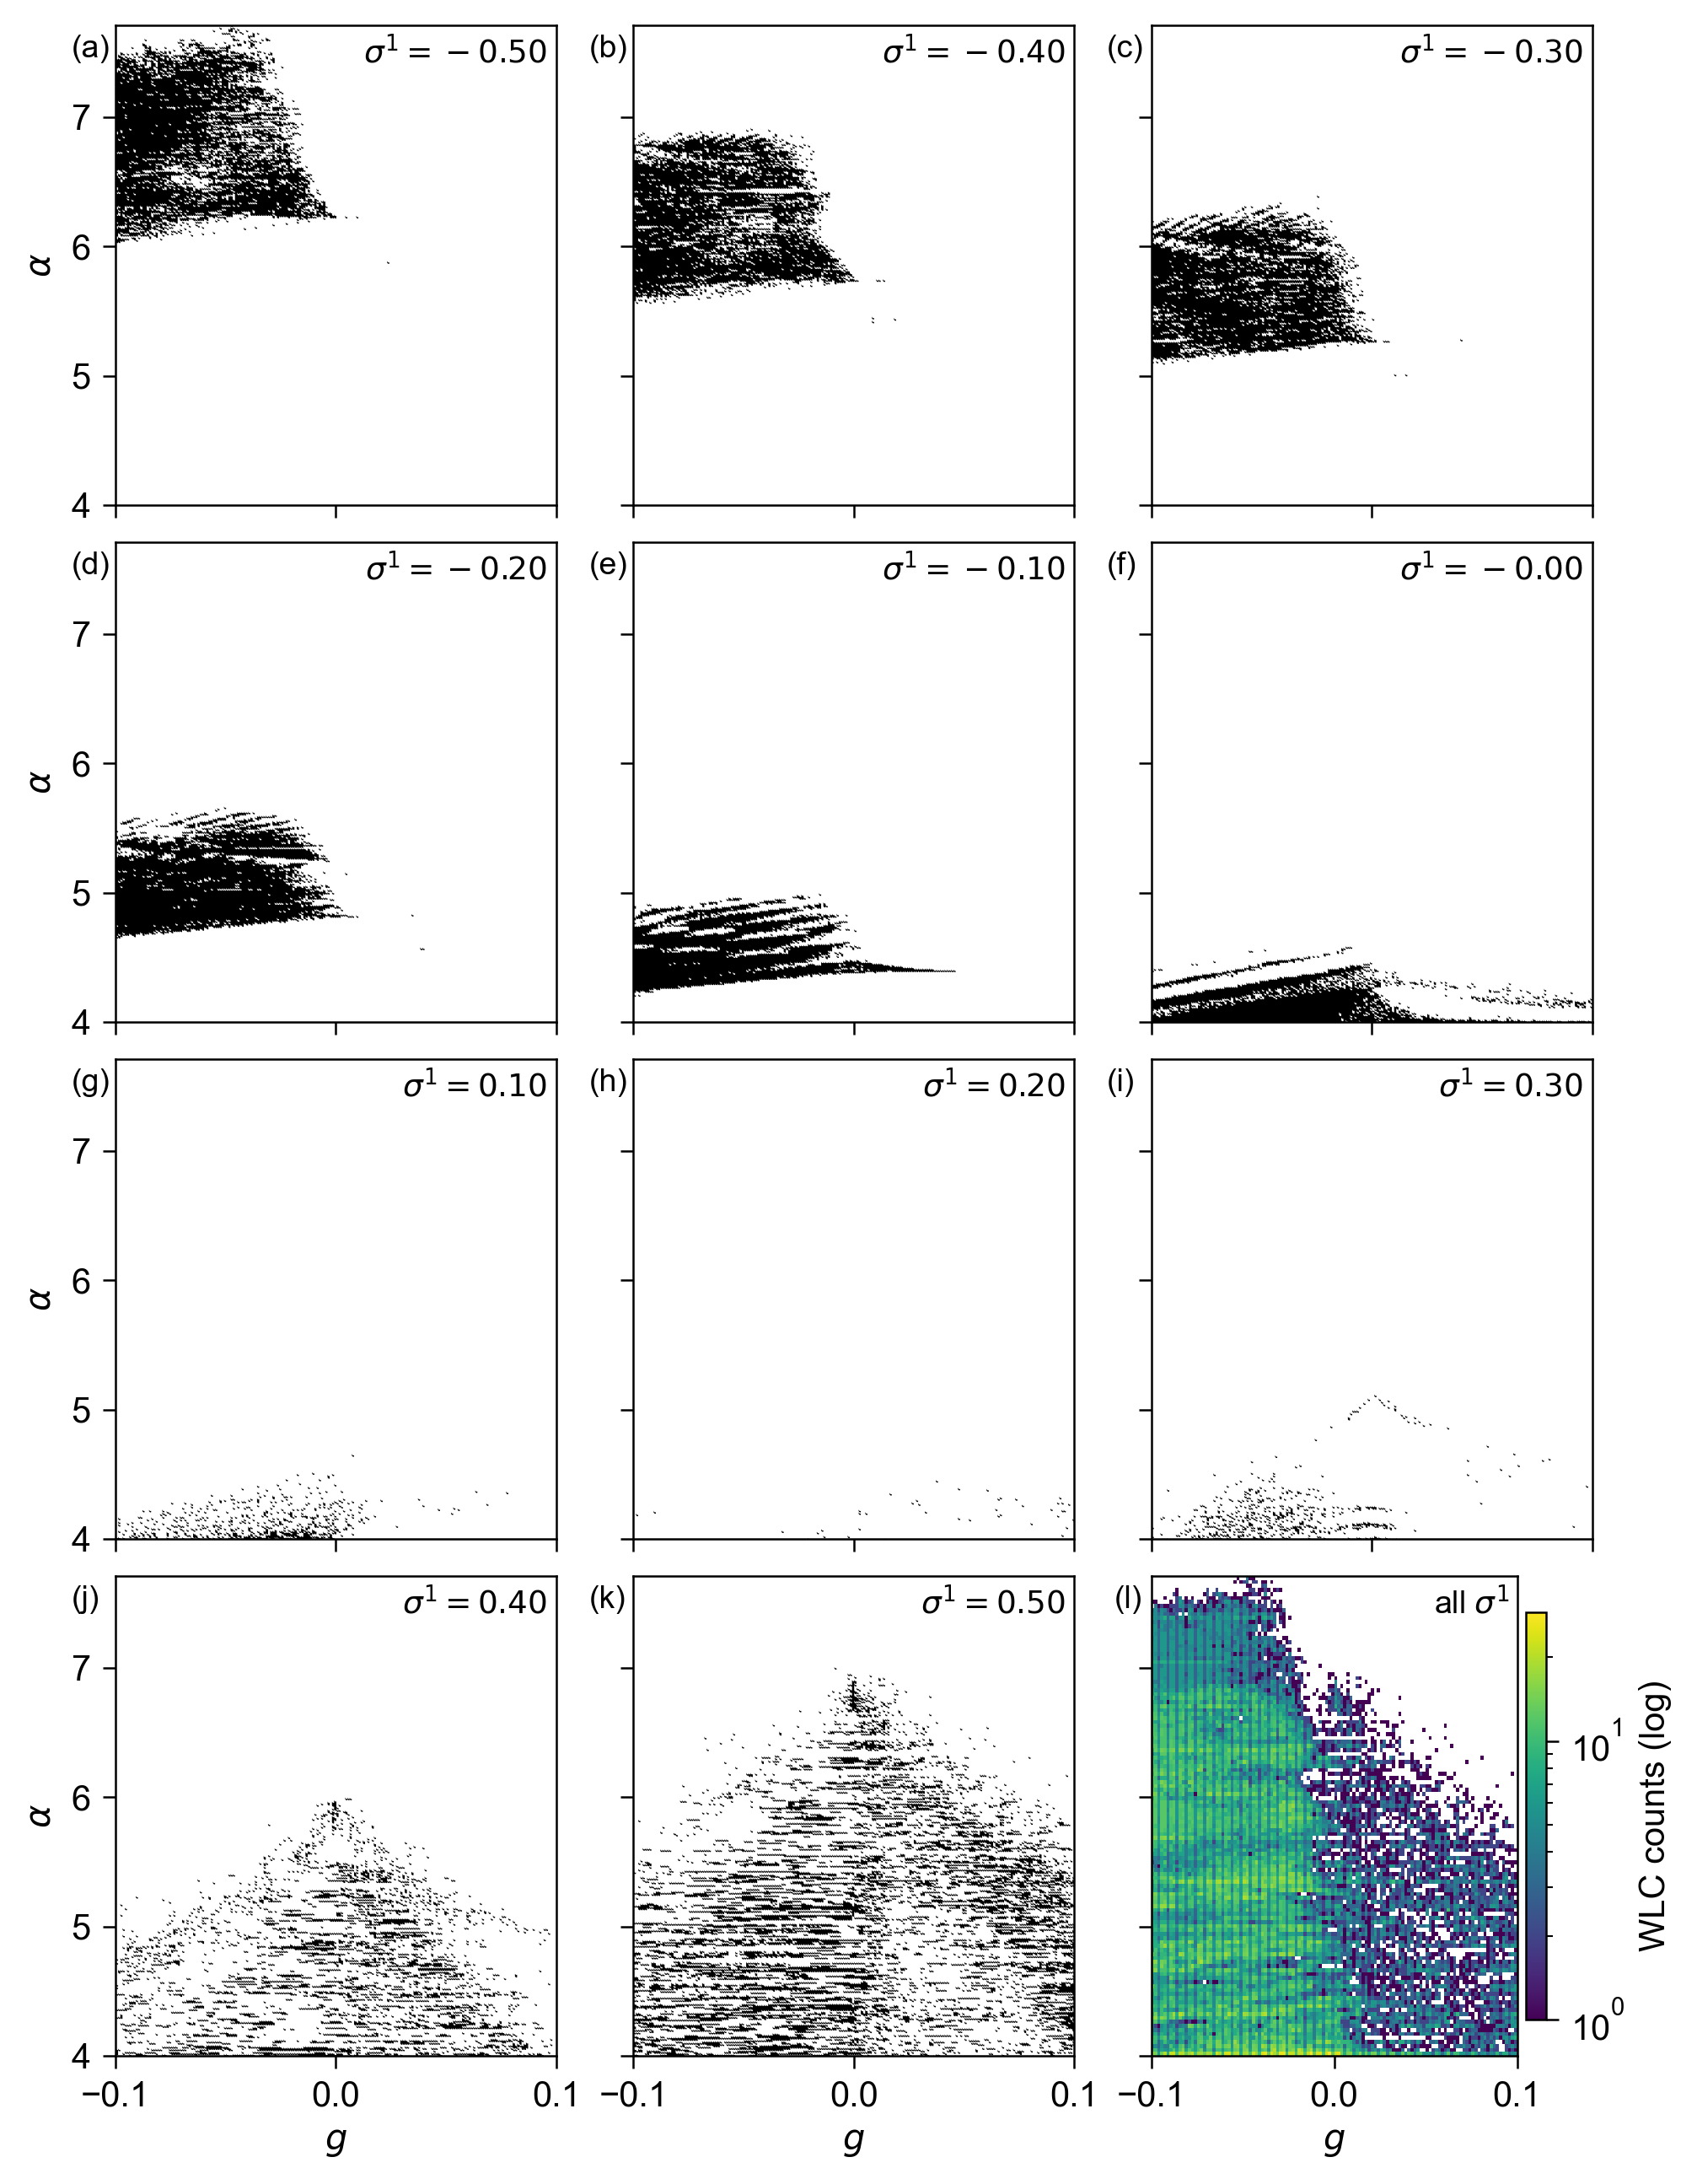

meta NOT subset; don't know how to subset; dropped
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


In [22]:
#For every sigma, We plotted a (g,alpha) two-dimensional map in fig (a) to (k). For (l), authors made a density of points graph, 
#to superposition them, and have a overview of all map together.
#


# =========================
# AIP double-column style
# =========================
mpl.rcParams.update({
    "figure.figsize": (6.69, 8.6),
    "figure.dpi": 300,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Liberation Sans", "DejaVu Sans"],
    "font.size": 10,
    "pdf.fonttype": 42, "ps.fonttype": 42,
    "axes.linewidth": 0.6,
    "xtick.major.width": 0.6, "ytick.major.width": 0.6,
})

#%%%%%%%%%% Path in my PC - change for your path%%%%%%%%
path_csv = r"C:\Users\luis_\Documents\ACADEMICAS\Maestría_Física_UCV\TESIS Maestría\Documento TESIS\00_PAPER_LP_EG\RESPONSE DIC 9\Response_Chaos\figures\Fig8\dataWLC.csv"
df = pd.read_csv(path_csv)

# Use sigmas in order
unique_sigma = np.sort(df["sigma"].unique())
sigmas_to_plot = unique_sigma[:11]

#Grid 3x4 setup
num_cols, num_rows = 3, 4
fig, axs = plt.subplots(num_rows, num_cols, sharex=True, sharey=True)
axs = np.array(axs).ravel()

labels = list(string.ascii_lowercase[:12])  # ['a','b',...,'l']

#First 11 panels> a to k represents WLC maps: alpha vs g in every sigma value.
for i, sigma_value in enumerate(sigmas_to_plot):
    ax = axs[i]
    f = df[df["sigma"] == sigma_value]
    g_vals = f["g"].to_numpy()
    a_vals = f["alfa"].to_numpy()
    p_vals = f["p"].to_numpy()

    colors = np.where(p_vals == 1, "black", "white")
    ax.scatter(g_vals, a_vals, c=colors, s=1.0, linewidths=0, edgecolors="none", rasterized=True)

    # Labeling> a to k
    panel_label(ax, labels[i])
    
    #Box for sigma in each subplot.
    ax.text(0.98, 0.98, rf"$\sigma^{{1}}={sigma_value:.2f}$",
            transform=ax.transAxes, ha="right", va="top", fontsize=9,
            bbox=dict(boxstyle="round,pad=0.15", facecolor="white", edgecolor="none", alpha=0.9))

# 4,3 panel: Points where WLC emerges for every sigma. Heatmap
ax_sum = axs[11]  # (4,3)

# Only p=1 (WLC happens)
df_wlc = df[(df["sigma"].isin(sigmas_to_plot)) & (df["p"] == 1)]
g_all = df_wlc["g"].to_numpy()
a_all = df_wlc["alfa"].to_numpy()

bins = (120, 120)

H = ax_sum.hist2d(
    g_all, a_all,
    bins=bins,
    norm=LogNorm(vmin=1),
    rasterized=True
)
panel_label(ax_sum, labels[11])
ax_sum.text(
    0.98, 0.98, r"all $\sigma^1$",
    transform=ax_sum.transAxes,
    ha="right", va="top", fontsize=9,
    bbox=dict(boxstyle="round,pad=0.15", facecolor="white", edgecolor="none", alpha=0.9)
)

cbar = fig.colorbar(H[3], ax=ax_sum, pad=0.02, shrink=0.85)
cbar.set_label(r"WLC counts (log)")

# ticks
for k, ax in enumerate(axs):
    if not ax.axison:
        continue
    r = k // num_cols
    c = k % num_cols
    ax.set_xlabel(r"$g$" if r == num_rows - 1 else "")
    ax.set_ylabel(r"$\alpha$" if c == 0 else "")

fig.tight_layout(pad=0.6, w_pad=0.4, h_pad=0.5)
plt.show()

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# SAVE Versions
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig.savefig("FigX_WLC_3x4_color.pdf", format="pdf", bbox_inches="tight")
fig.savefig("FigX_WLC_3x4_color.eps", format="eps", bbox_inches="tight")
fig.savefig("FigX_WLC_3x4_color.tiff", format="tiff", dpi=300, bbox_inches="tight")
# %%%%%%%Convert to grayscale (B/W version)%%%%%
for ax in fig.axes:
    for im in ax.get_images():
        im.set_cmap("gray")
    for coll in ax.collections:
        try:
            coll.set_cmap("gray")
        except Exception:
            pass
        
fig.savefig("FigX_WLC_3x4_BW.pdf", format="pdf", bbox_inches="tight") #BW
fig.savefig("FigX_WLC_3x4_BW.tiff", format="tiff", dpi=600, bbox_inches="tight")



